# Project: Investigating Movie Data (1960 - 2015)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
For this project, I examined the TMDB-movies data set. I was particularly interested in genres and when movies were released. I decided to pursue the data set with the following two questions: <br>
1. Which genres are most common from year to year?
2. Which quarter generates the most movies in the popular top10 in our data set?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#  Loading and examining raw data.
df_movies = pd.read_csv('./tmdb-movies.csv')

In [3]:
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

There is null data in genres. We are going to drop those rows. Our analysis will require the genres column to be non-null.

In [5]:
df_movies = df_movies.dropna(subset=['genres'])
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'], format='%m/%d/%y')
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 21 columns):
id                      10843 non-null int64
imdb_id                 10835 non-null object
popularity              10843 non-null float64
budget                  10843 non-null int64
revenue                 10843 non-null int64
original_title          10843 non-null object
cast                    10768 non-null object
homepage                2931 non-null object
director                10801 non-null object
tagline                 8037 non-null object
keywords                9368 non-null object
overview                10840 non-null object
runtime                 10843 non-null int64
genres                  10843 non-null object
production_companies    9827 non-null object
release_date            10843 non-null datetime64[ns]
vote_count              10843 non-null int64
vote_average            10843 non-null float64
release_year            10843 non-null int64
budget_adj       



### Data Cleaning (For Research Question 1 About Genres)

The difficult part with our data set is the multi-value instances in columns such as genre, director, and cast. After researching how other analysts have dealt with this multi-value problem, I've decided for my data analysis process, it is best to create new data frames with multiple new rows with same values except for the multi-value instances, which would be expanded. For example, Jurassic World would have 5 rows with different genres.

Resources used: <br>
http://ramiro.org/notebook/movie-body-counts/ <br>
https://stackoverflow.com/questions/44743109/plotting-average-by-each-genres-pandas <br>
https://stackoverflow.com/questions/26777832/replicating-rows-in-a-pandas-data-frame-by-a-column-value <br>
flat list: https://stackoverflow.com/questions/952914/making-a-flat-list-out-of-list-of-lists-in-python

In [6]:
#   splits the genres column into a list
df_genres = df_movies[['popularity', 'genres', 'release_year']]
df_genres_split = df_genres['genres'].str.split('|')
genres_split_len = df_genres_split.str.len()


# repeat/populate popularity and release_year data
df_genres_final = pd.DataFrame({'popularity':np.repeat(df_genres['popularity'],genres_split_len),
                                'release_year':np.repeat(df_genres['release_year'],genres_split_len)})

# populate the genres column with the flat genres list and add into dataframe
genres_list= df_genres_split.tolist()
flat_genres_list = [item for sublist in genres_list for item in sublist]
df_genres_final['genres'] = flat_genres_list
df_genres_final.head()



,popularity,release_year,genres
0,32.985763,2015,Action
0,32.985763,2015,Adventure
0,32.985763,2015,Science Fiction
0,32.985763,2015,Thriller
1,28.419936,2015,Action


In [7]:
# count the genres
df_genres_final = df_genres_final.groupby(['release_year', 'genres']).count()
df_genres_final.rename(columns = {'popularity':'counts'}, inplace = True)
df_genres_final.tail(19)

counts
release_year genres                 
2015         Action              107
             Adventure            69
             Animation            39
             Comedy              162
             Crime                51
             Documentary          57
             Drama               260
             Family               44
             Fantasy              33
             History              15
             Horror              125
             Music                33
             Mystery              42
             Romance              57
             Science Fiction      86
             TV Movie             20
             Thriller            171
             War                   9
             Western               6

### Data Cleaning (For Research Question 2 about Quarterly Popularity)

In [29]:
# create a new dataframe for this investigation
df_top10_quarter = df_movies[['popularity','original_title','release_date','release_year']]

In [30]:
# Get the top10 of each year. reference: https://stackoverflow.com/questions/20067636/pandas-dataframe-get-first-row-of-each-group

df_top10_quarter = df_top10_quarter.groupby('release_year').head(10)

In [31]:
# create a release_month column so we can compare between the years.
# reference: https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-from-pandas-datetime-column-python
df_top10_quarter['release_month'] = pd.DatetimeIndex(df_top10_quarter['release_date']).month

In [34]:
df_top10_quarter['release_quarter'] = pd.cut(df_top10_quarter['release_month'], bins=(0, 3, 6, 9, 12), labels = ['Q1', 'Q2', 'Q3', 'Q4'])

df_top10_quarter.head()

,popularity,original_title,release_date,release_year,release_month,release_quarter
0,32.985763,Jurassic World,2015-06-09,2015,6,Q2
1,28.419936,Mad Max: Fury Road,2015-05-13,2015,5,Q2
2,13.112507,Insurgent,2015-03-18,2015,3,Q1
3,11.173104,Star Wars: The Force Awakens,2015-12-15,2015,12,Q4
4,9.335014,Furious 7,2015-04-01,2015,4,Q2


In [12]:
# group the data set to view which quarters are most popular per year
df_top10_quarter_final = df_top10_quarter.groupby(['release_year','release_quarter'])['popularity'].count()
df_top10_quarter_final

release_year  release_quarter
1960          Q1                 1
              Q2                 2
              Q3                 3
              Q4                 4
1961          Q1                 2
              Q2                 2
              Q4                 6
1962          Q2                 4
              Q4                 6
1963          Q1                 1
              Q2                 3
              Q3                 1
              Q4                 5
1964          Q1                 2
              Q2                 2
              Q3                 4
              Q4                 2
1965          Q1                 2
              Q2                 2
              Q3                 2
              Q4                 4
1966          Q2                 1
              Q3                 4
              Q4                 5
1967          Q1                 1
              Q2                 4
              Q3                 1
              Q4         

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Which genres are most common from year to year?

In [12]:
df_genres_final2 = df_genres_final.reset_index()

In [13]:
df_genres_final2.head()

,release_year,genres,counts
0,1960,Action,8
1,1960,Adventure,5
2,1960,Comedy,8
3,1960,Crime,2
4,1960,Drama,13


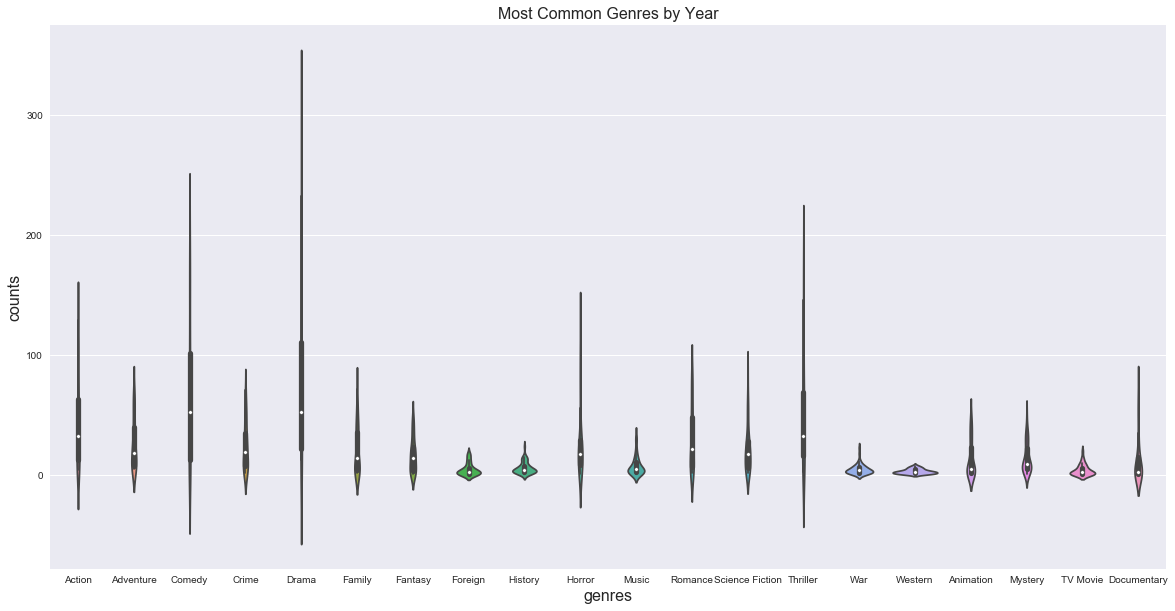

In [19]:
plt.figure(figsize=(20,10))
plt.title('Most Common Genres by Year', fontsize =16)
plt.xlabel('Year & Most Common Genre', fontsize = 16)
plt.ylabel('Number of Movies Release with the Genre', fontsize = 16)
sns.violinplot(x='genres', y='counts',data=df_genres_final2)

In [13]:
# modify the dataframe to only display the most popular movie genre for each year
df_popular_genres = df_genres_final.loc[df_genres_final.groupby('release_year')['counts'].idxmax()]

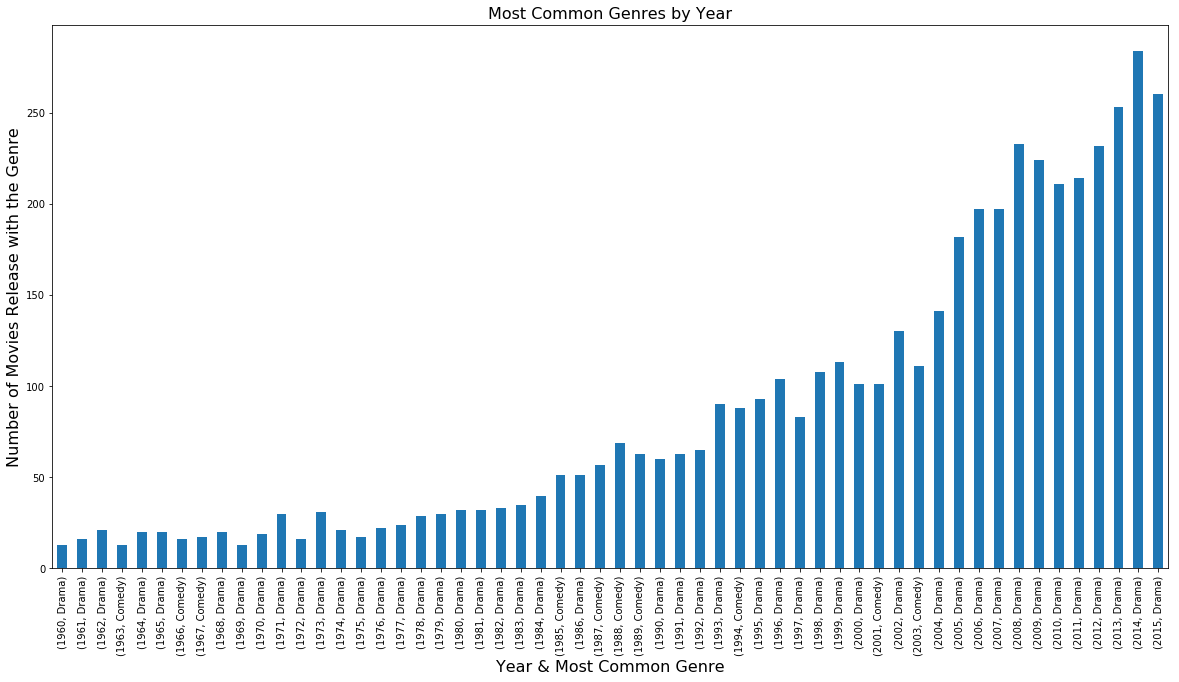

In [14]:
df_popular_genres.plot(kind = 'bar', figsize=(20,10))
plt.title('Most Common Genres by Year', fontsize =16)
plt.xlabel('Year & Most Common Genre', fontsize = 16)
plt.ylabel('Number of Movies Release with the Genre', fontsize = 16)
plt.legend().set_visible(False)

The graph above is useful in finding out which genre was most popular and how many movies included that genre for that year. However, we can better compare year to year data by looking at it in percentages. <br>
Reference: percent calculation using lambda was found here: https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby

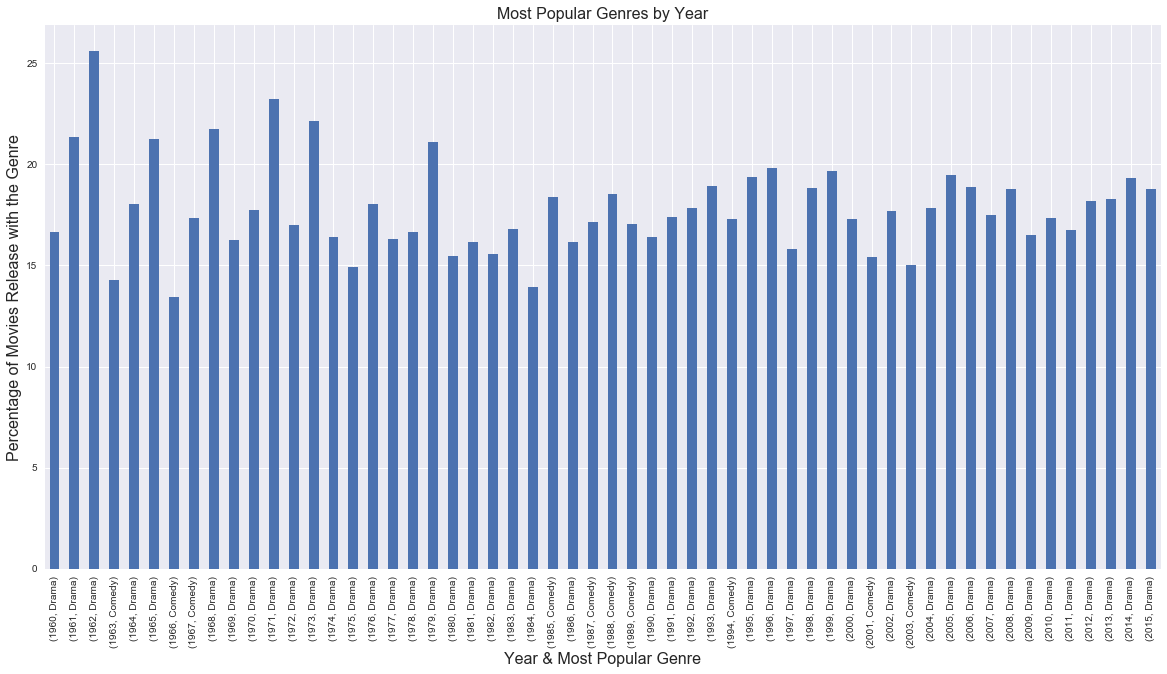

In [20]:
df_popular_genres_pct= df_genres_final.groupby(['release_year']).apply(lambda x: 100 * x / x.sum())
df_popular_genres_pct_hist = df_popular_genres_pct.loc[df_popular_genres_pct.groupby('release_year')['counts'].idxmax()]
df_popular_genres_pct_hist.plot(kind = 'bar', figsize=(20,10))
plt.title('Most Popular Genres by Year', fontsize =16)
plt.xlabel('Year & Most Popular Genre', fontsize = 16)
plt.ylabel('Percentage of Movies Release with the Genre', fontsize = 16)
plt.legend().set_visible(False)

In [22]:
df_popular_genres_pct= df_popular_genres_pct.reset_index()

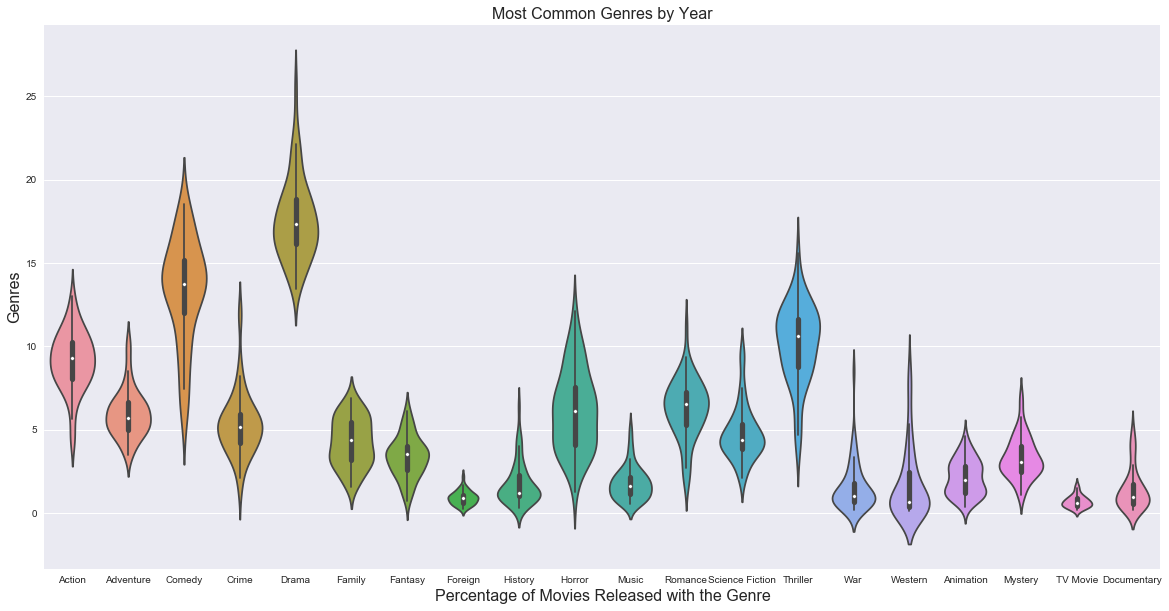

In [27]:
plt.figure(figsize=(20,10))
plt.title('Most Common Genres by Year', fontsize =16)
sns.violinplot(x='genres', y='counts',data=df_popular_genres_pct, scale = 'count')
plt.xlabel('Percentage of Movies Released with the Genre', fontsize = 16)
plt.ylabel('Genres', fontsize = 16)

From the bar graph above, we can see that year to year, the most popular genre is drama followed by comedy. In my analysis, I defined the "most popular genre" as the genre that the most number of movies associate themselves with.

### Research Question 2: Which quarter generates the most movies in the popular top10 in our data set?

In [16]:
# group the dataframe into quarters and sum the top10 into the quarters
df_quarters = df_top10_quarter_final.groupby('release_quarter').sum()
df_quarters

release_quarter
Q1     67
Q2    177
Q3    119
Q4    197
Name: popularity, dtype: int64

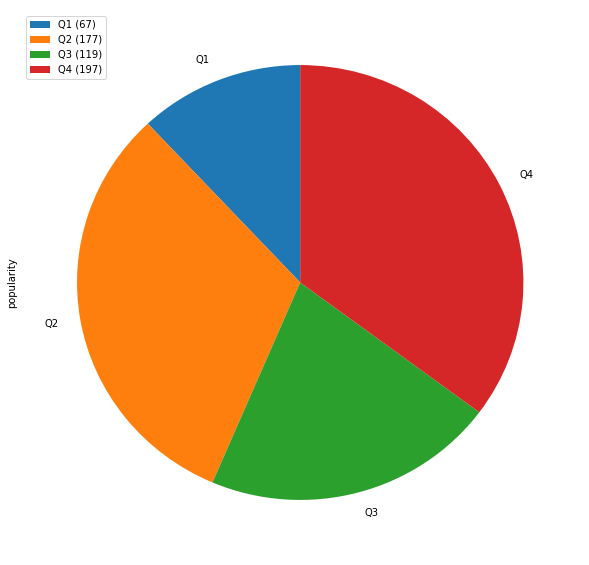

In [17]:
df_quarters.plot(kind = 'pie', figsize=(10,10), startangle = 90)
labels = [r'Q1 (67)', r'Q2 (177)', r'Q3 (119)', r'Q4 (197)']
plt.legend(labels, loc="best")

From the pie chart above, we see that movies that make it into the top 10 each year are mostly in quarters 2 and 4.

<a id='conclusions'></a>
## Conclusions


From my year-to-year analysis of genres, most movies are released in the drama genre, followed by comedy. It seems like if a genre exceeds 13% of all movies released that year, it will have a high chance of being the most common genre in that year.<br> <br>
From the quarterly analysis of the top 10 movies of each year, the most popular movies are usually released in quarters 2 and 4. When doing this analysis, I was hoping to find when is the best quarter to release movies if I was a producer. From the analysis, it seems like quarters 2 and 4 are popular period to release top movies. However, I think there are a lot more variables at play here than just release date. A movie may be released in a quarter and do well in subsequent quarters, or maybe there are lack of good movies in subsequent quarters that result in a movie in the previous quarter to gain the top 10 spot. Although not definitive, it seems like quarter 1 is the least likely period to have a movie in the top 10.